## Job Openings and Labor Turn Over Survey (JOLTS)
Is the US really experiencing a record wave of people quitting their jobs? Is that wave taking place equally across different US regions? This week, we analyze the government's JOLTS data.

### Imports

In [431]:
# Import
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from urllib.request import urlretrieve
from typing import Optional, Union
import os
pd.set_option("display.max_columns", None)
print("Setup Complete")

Setup Complete


### Q1-Fetch and Read Series data

In [221]:
# Q1- Read Data
def read_and_tweak(rel_file_path: str, drop_cols: Optional[list]=[""]) -> pd.DataFrame:
    pwd = os.getcwd()
    local_file = os.path.join(pwd, rel_file_path)
    df = (
        pd.read_csv(local_file, delimiter="\t")
        .rename(columns=lambda col: col.strip())
        .apply(lambda x: x.str.strip() if x.dtype == "object" else x)
        .set_index("series_id")
        .drop(columns=drop_cols, errors="ignore")
    )
    return df


df_series = read_and_tweak(rel_file_path="data/jt.txt", drop_cols=["footnote_codes"])
df_series


,seasonal,industry_code,state_code,area_code,sizeclass_code,dataelement_code,ratelevel_code,begin_year,begin_period,end_year,end_period
series_id,,,,,,,,,,,
JTS000000000000000HIL,S,0,0,0,0,HI,L,2000,M12,2023,M03
JTS000000000000000HIR,S,0,0,0,0,HI,R,2000,M12,2023,M03
JTS000000000000000JOL,S,0,0,0,0,JO,L,2000,M12,2023,M03
JTS000000000000000JOR,S,0,0,0,0,JO,R,2000,M12,2023,M03
JTS000000000000000LDL,S,0,0,0,0,LD,L,2000,M12,2023,M03
...,...,...,...,...,...,...,...,...,...,...,...
JTU929000000000000OSR,U,929000,0,0,0,OS,R,2000,M12,2023,M03
JTU929000000000000QUL,U,929000,0,0,0,QU,L,2000,M12,2023,M03
JTU929000000000000QUR,U,929000,0,0,0,QU,R,2000,M12,2023,M03


### Q2-Fetch and Read AllItems data

In [225]:
# Q2- Fetch and Read AllItems data
def read_and_tweak(rel_file_path: str, drop_cols: Optional[list]=[""]) -> pd.DataFrame:
    pwd = os.getcwd()
    local_file = os.path.join(pwd, rel_file_path)
    df = (
        pd.read_csv(local_file, delimiter="\t")
        .rename(columns=lambda col: col.strip())
        .apply(lambda x: x.str.strip() if x.dtype == "object" else x)
        .set_index("series_id")
        .drop(columns=drop_cols, errors="ignore")
    )
    return df

df_all_items = read_and_tweak(rel_file_path="data/jt.data.1.txt", drop_cols=["footnote_codes"])
df_all_items

,year,period,value
series_id,,,
JTS000000000000000HIL,2000,M12,5426.0
JTS000000000000000HIL,2001,M01,5722.0
JTS000000000000000HIL,2001,M02,5303.0
JTS000000000000000HIL,2001,M03,5528.0
JTS000000000000000HIL,2001,M04,5204.0
...,...,...,...
JTU929000000000000TSR,2022,M12,2.0
JTU929000000000000TSR,2022,M13,1.9
JTU929000000000000TSR,2023,M01,1.5


### Q3 -Create a new data frame combining all of the columns from these two.


In [226]:
# Q3 -Create a new data frame combining all of the columns from these two.
df = df_all_items.merge(df_series, on=["series_id"])
df

,year,period,value,seasonal,industry_code,state_code,area_code,sizeclass_code,dataelement_code,ratelevel_code,begin_year,begin_period,end_year,end_period
series_id,,,,,,,,,,,,,,
JTS000000000000000HIL,2000,M12,5426.0,S,0,0,0,0,HI,L,2000,M12,2023,M03
JTS000000000000000HIL,2001,M01,5722.0,S,0,0,0,0,HI,L,2000,M12,2023,M03
JTS000000000000000HIL,2001,M02,5303.0,S,0,0,0,0,HI,L,2000,M12,2023,M03
JTS000000000000000HIL,2001,M03,5528.0,S,0,0,0,0,HI,L,2000,M12,2023,M03
JTS000000000000000HIL,2001,M04,5204.0,S,0,0,0,0,HI,L,2000,M12,2023,M03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
JTU929000000000000TSR,2022,M12,2.0,U,929000,0,0,0,TS,R,2000,M12,2023,M03
JTU929000000000000TSR,2022,M13,1.9,U,929000,0,0,0,TS,R,2000,M12,2023,M03
JTU929000000000000TSR,2023,M01,1.5,U,929000,0,0,0,TS,R,2000,M12,2023,M03


In [227]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 549799 entries, JTS000000000000000HIL to JTU929000000000000TSR
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   year              549799 non-null  int64  
 1   period            549799 non-null  object 
 2   value             549799 non-null  float64
 3   seasonal          549799 non-null  object 
 4   industry_code     549799 non-null  int64  
 5   state_code        549799 non-null  object 
 6   area_code         549799 non-null  int64  
 7   sizeclass_code    549799 non-null  int64  
 8   dataelement_code  549799 non-null  object 
 9   ratelevel_code    549799 non-null  object 
 10  begin_year        549799 non-null  int64  
 11  begin_period      549799 non-null  object 
 12  end_year          549799 non-null  int64  
 13  end_period        549799 non-null  object 
dtypes: float64(1), int64(6), object(7)
memory usage: 62.9+ MB


In [83]:
df.state_code.unique()

array(['0', '1', '2', '4', '5', '6', '8', '9', '10', '11', '12', '13',
       '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25',
       '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36',
       '37', '38', '39', '40', '41', '42', '44', '45', '46', '47', '48',
       '49', '50', '51', '53', '54', '55', '56', 'MW', 'NE', 'SO', 'WE'],
      dtype=object)

In [228]:
# EDA
print(df.dataelement_code.unique())
print(df.ratelevel_code.unique())

['HI' 'JO' 'LD' 'OS' 'QU' 'TS' 'UO']
['L' 'R']


### Q4 - Find the most recent quits rate, across the entire United States, for all nonfarm jobs. This means getting the `QU` code, the 0 `industry_code`, and the `'00'` value for `state_code`. We'll ask for seasonally adjusted numbers and will be asking for a rate, rather than the absolute number (i.e., `'R'` for `ratelevel_code` and `'S'` for `seasonal`).

In [235]:
df_QU.columns

Index(['year', 'period', 'value', 'seasonal', 'industry_code', 'state_code',
       'area_code', 'sizeclass_code', 'dataelement_code', 'ratelevel_code',
       'begin_year', 'begin_period', 'end_year', 'end_period', 'datetime'],
      dtype='object')

In [282]:
# Q4- Find the most recent quits rate, across the entire United States, for all nonfarm jobs.
# This means getting the `QU` code, the 0 `industry_code`, and the `'00'` value for `state_code`.
# We'll ask for seasonally adjusted numbers and will be asking for a rate,
# rather than the absolute number (i.e., `'R'` for `ratelevel_code` and `'S'` for `seasonal`).
from datetime import datetime

df_QU = (
    df.query(
        "dataelement_code == 'QU' & \
        industry_code == 0 & \
        state_code == '0' & \
        seasonal == 'S' & \
        ratelevel_code == 'R'"
    )
).assign(
    begin_date=lambda df: pd.to_datetime(
        df["begin_year"].astype(str) + "-" + df["begin_period"].str.strip("M") + "-01",
        format="%Y-%m-%d",
    ),
    end_date=lambda df: pd.to_datetime(
        df["year"].astype(str) + "-" + df["period"].str.strip("M") + "-01",
        format="%Y-%m-%d",
    )
    # Weird if you use f-string this will not work
)
# Sort by year
df_QU.sort_values(by=["year"], ascending=False)


,year,period,value,seasonal,industry_code,state_code,area_code,sizeclass_code,dataelement_code,ratelevel_code,begin_year,begin_period,end_year,end_period,begin_date,end_date
series_id,,,,,,,,,,,,,,,,
JTS000000000000000QUR,2023,M03,2.5,S,0,0,0,0,QU,R,2000,M12,2023,M03,2000-12-01,2023-03-01
JTS000000000000000QUR,2023,M02,2.6,S,0,0,0,0,QU,R,2000,M12,2023,M03,2000-12-01,2023-02-01
JTS000000000000000QUR,2023,M01,2.5,S,0,0,0,0,QU,R,2000,M12,2023,M03,2000-12-01,2023-01-01
JTS000000000000000QUR,2022,M07,2.6,S,0,0,0,0,QU,R,2000,M12,2023,M03,2000-12-01,2022-07-01
JTS000000000000000QUR,2022,M01,2.9,S,0,0,0,0,QU,R,2000,M12,2023,M03,2000-12-01,2022-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
JTS000000000000000QUR,2001,M09,2.1,S,0,0,0,0,QU,R,2000,M12,2023,M03,2000-12-01,2001-09-01
JTS000000000000000QUR,2001,M10,2.1,S,0,0,0,0,QU,R,2000,M12,2023,M03,2000-12-01,2001-10-01
JTS000000000000000QUR,2001,M11,2.0,S,0,0,0,0,QU,R,2000,M12,2023,M03,2000-12-01,2001-11-01


### There are 12 JOLTS reports per year. In each year on record, how many reports showed the quits rate to be higher than this most recent value?

In [496]:
# Q5- There are 12 JOLTS reports per year. In each year on record, 
# how many reports showed the quits rate to be higher than this most recent value?
qu_rate_latest = df_QU["value"].loc[df_QU["end_date"] == df_QU["end_date"].max()][0]
recent_date = df_QU['end_date'].max().strftime('%Y-%m-%d')
df_num_reports_gte_recent = df_QU.loc[df_QU["value"] >= qu_rate_latest]
num_reports_gte_recent = df_num_reports_gte_recent.shape[0]
print(f"The latest QU rate is: {qu_rate_latest}")
print(f"Number of quit reports that are higher than the most recent value {recent_date} is: {num_reports_gte_recent}")

The latest QU rate is: 2.5
Number of quit reports that are higher than the most recent value 2023-03-01 is: 25


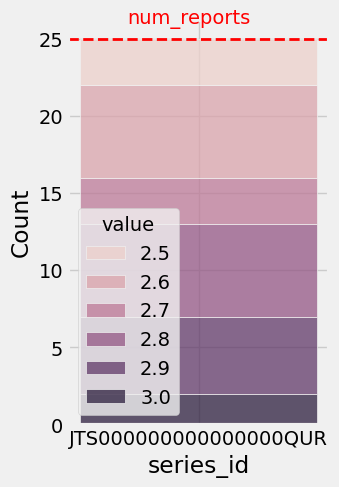

In [497]:
# Q5- There are 12 JOLTS reports per year. In each year on record, 
# how many reports showed the quits rate to be higher than this most recent value?

# Plot
# Style
plt.style.use("fivethirtyeight")
plt.figure(figsize=(3,5))

sns.histplot(data=df_num_reports_gte_recent, x="series_id", hue="value", multiple="stack")
plt.axhline(num_reports_gte_recent, color="red", lw=2, ls="--")
plt.text(-0.3, num_reports_gte_recent + 1, "num_reports", color="red")
plt.show()

### Q6- The states-name data (https://download.bls.gov/pub/time.series/jt/jt.state) lists four regions of the United States. Show the most recent quits data for the most recent time period. In which region are people quitting the most? The least?

In [415]:
# Q6-The states-name data (https://download.bls.gov/pub/time.series/jt/jt.state) lists four regions of the United States. 
# Show the most recent quits data for the most recent time period. In which region are people quitting the most? The least?
pwd = os.getcwd()
jt_state_path = os.path.join(pwd,"data/jt-state.txt")
df_state = pd.read_csv(jt_state_path, delimiter="\t").drop(columns=["display_level", "selectable",  "sort_sequence"])

df_QU_ = (
    df.query(
        "dataelement_code == 'QU' & \
        industry_code == 0 & \
        state_code in ['MW', 'NE', 'SO', 'WE'] & \
        seasonal == 'S' & \
        ratelevel_code == 'R' & \
        year == 2023 & \
        period == 'M03'"
    )
).assign(
    begin_date=lambda df: pd.to_datetime(
        df["begin_year"].astype(str) + "-" + df["begin_period"].str.strip("M") + "-01",
        format="%Y-%m-%d",
    ),
    end_date=lambda df: pd.to_datetime(
        df["year"].astype(str) + "-" + df["period"].str.strip("M") + "-01",
        format="%Y-%m-%d",
    )
    # Weird if you use f-string this will not work
)
# Sort by year
df_QU_.sort_values(by=["year"], ascending=False)

# Merge
df_QU_ = df_QU_.reset_index()
df_merge_state = df_QU_.merge(df_state, on="state_code", how="left")
# df_gb_region
# Group by state then aggregate values by mean
df_gb = df_merge_state.groupby(by=["state_code", "year"]).agg({"value":"mean"}).sort_values(by="value", ascending=False)
df_gb


,,value
state_code,year,
SO,2023,3.0
MW,2023,2.4
WE,2023,2.3
NE,2023,1.9


### Q7-Create a plot showing the quits level for each of these four regions over time. The x axis should be time (year + period) and the y axis should be the quits rate. What region's quits rate is consistently the highest? Which is consistently the lowest?

In [418]:
# Q7-Create a plot showing the quits level for each of these four regions over time. 
# The x axis should be time (year + period) and the y axis should be the quits rate. 
# What region's quits rate is consistently the highest? Which is consistently the lowest?

df_QU_all = (
    df.query(
        "dataelement_code == 'QU' & \
        industry_code == 0 & \
        state_code in ['MW', 'NE', 'SO', 'WE'] & \
        seasonal == 'S' & \
        ratelevel_code == 'R'"
    )
).assign(
    begin_date=lambda df: pd.to_datetime(
        df["begin_year"].astype(str) + "-" + df["begin_period"].str.strip("M") + "-01",
        format="%Y-%m-%d",
    ),
    end_date=lambda df: pd.to_datetime(
        df["year"].astype(str) + "-" + df["period"].str.strip("M") + "-01",
        format="%Y-%m-%d",
    )
    # Weird if you use f-string this will not work
)

df_QU_all



,year,period,value,seasonal,industry_code,state_code,area_code,sizeclass_code,dataelement_code,ratelevel_code,begin_year,begin_period,end_year,end_period,begin_date,end_date
series_id,,,,,,,,,,,,,,,,
JTS000000MW0000000QUR,2000,M12,2.4,S,0,MW,0,0,QU,R,2000,M12,2023,M03,2000-12-01,2000-12-01
JTS000000MW0000000QUR,2001,M01,2.6,S,0,MW,0,0,QU,R,2000,M12,2023,M03,2000-12-01,2001-01-01
JTS000000MW0000000QUR,2001,M02,2.4,S,0,MW,0,0,QU,R,2000,M12,2023,M03,2000-12-01,2001-02-01
JTS000000MW0000000QUR,2001,M03,2.5,S,0,MW,0,0,QU,R,2000,M12,2023,M03,2000-12-01,2001-03-01
JTS000000MW0000000QUR,2001,M04,2.4,S,0,MW,0,0,QU,R,2000,M12,2023,M03,2000-12-01,2001-04-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
JTS000000WE0000000QUR,2022,M11,3.0,S,0,WE,0,0,QU,R,2000,M12,2023,M03,2000-12-01,2022-11-01
JTS000000WE0000000QUR,2022,M12,2.7,S,0,WE,0,0,QU,R,2000,M12,2023,M03,2000-12-01,2022-12-01
JTS000000WE0000000QUR,2023,M01,2.5,S,0,WE,0,0,QU,R,2000,M12,2023,M03,2000-12-01,2023-01-01


In [435]:
def line_plot(
    df: pd.DataFrame,
    x: str,
    y: str,
    hue: str,
    color_map: Optional[Union[str, list, dict]] = None,
    year_interval: int=5,
):
    # Style
    plt.style.use("fivethirtyeight")
    fig, ax = plt.subplots(figsize=(20, 5))

    # Plot
    ax = sns.lineplot(df, x=x, y=y, hue=hue, palette=color_map, alpha=0.9, legend=False)
    # Add the text--for each line, find the end, annotate it with a label, and
    # adjust the chart axes so that everything fits on.
    for line, name in zip(ax.lines, df[hue].unique()):
        y = line.get_ydata()[-1]  # NB: to use start value, set [-1] to [0] instead
        x = line.get_xdata()[-1]
        if not np.isfinite(y):
            y = next(reversed(line.get_ydata()[~line.get_ydata().mask]), float("nan"))
        if not np.isfinite(y) or not np.isfinite(x):
            continue
        text = ax.annotate(
            name,
            xy=(x, y),
            xytext=(2, -2),  # YOU CAN ADJUST THE LOC OF LABEL HERE
            color=line.get_color(),
            xycoords=(ax.get_xaxis_transform(), ax.get_yaxis_transform()),
            textcoords="offset points",
            fontweight="regular",
        )
        text_width = (
            text.get_window_extent(fig.canvas.get_renderer())
            .transformed(ax.transData.inverted())
            .width
        )
        if np.isfinite(text_width):
            ax.set_xlim(ax.get_xlim()[0], text.xy[0] + text_width * 1.05)

    # Format x-axis to view dates properly
    ax.xaxis.set_major_locator(mdates.YearLocator(base=year_interval))
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%b-%Y"))

    # Show plot
    plt.show()
    return

#### Q7- Plot-Line

<Figure size 1500x500 with 0 Axes>

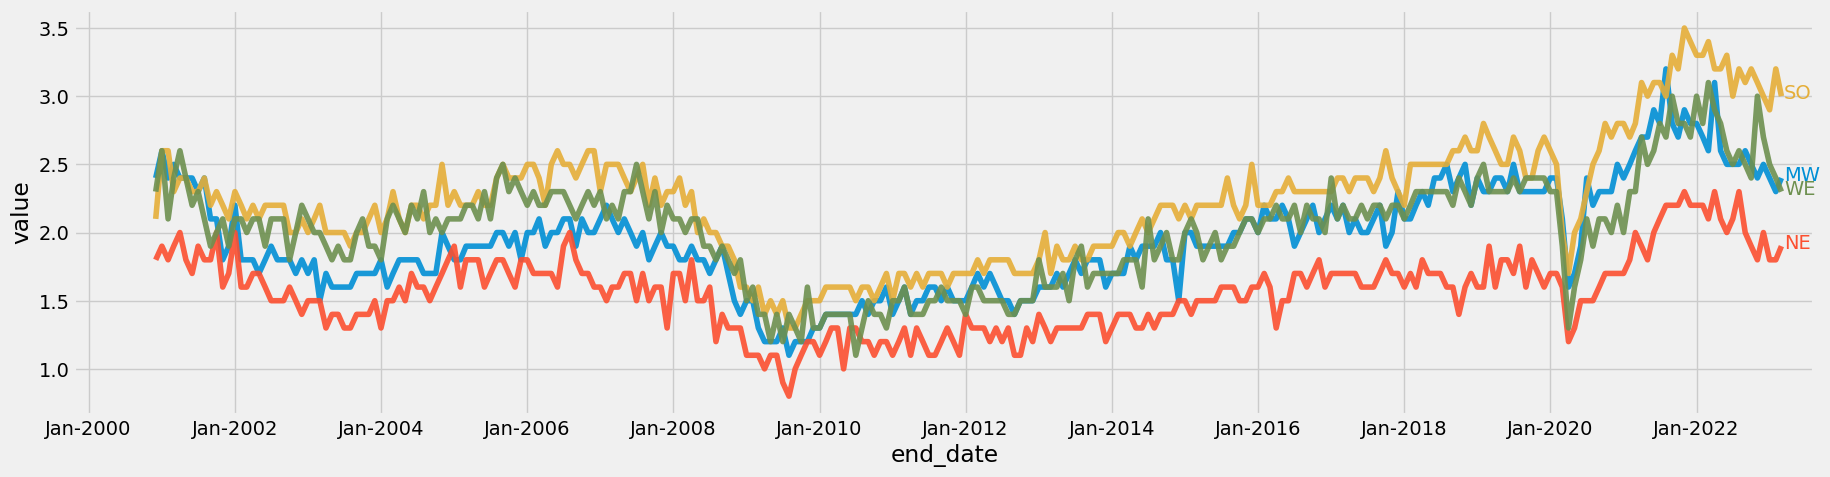

In [437]:
# Plot
# Style
plt.style.use("fivethirtyeight")
plt.figure(figsize=(15,5))

line_plot(df=df_QU_all, x="end_date", y="value", hue="state_code", year_interval=2)



### Q8- Create a data frame in which the index contains the year and period, and with two columns -- the quits rate (QU) and the number of job openings (JO), both for the entire United States. How highly correlated are these values?

In [439]:
df["dataelement_code"].unique()

array(['HI', 'JO', 'LD', 'OS', 'QU', 'TS', 'UO'], dtype=object)

In [486]:
# Q8- Create a data frame in which the index contains the year and period, and with two columns 
# -- the quits rate (QU) and the number of job openings (JO),
# both for the entire United States. How highly correlated are these values?

df_q8 = df.query(
        "dataelement_code in ['QU', 'JO'] & \
        industry_code == 0 & \
        state_code in ['MW', 'NE', 'SO', 'WE'] & \
        seasonal == 'S' & \
        ratelevel_code == 'R'"
    )
# Pivot 
df_pivot = pd.pivot_table(df_q8, values="value", columns=["dataelement_code"], index=["year", "period"])
df_pivot



dataelement_code     JO     QU
year period                   
2000 M12          3.725  2.150
2001 M01          3.800  2.425
     M02          3.700  2.225
     M03          3.500  2.275
     M04          3.400  2.350
...                 ...    ...
2022 M11          6.350  2.575
     M12          6.675  2.550
2023 M01          6.250  2.400
     M02          5.900  2.425
     M03          5.650  2.400

[268 rows x 2 columns]

#### Plot-Correlation Heatmap

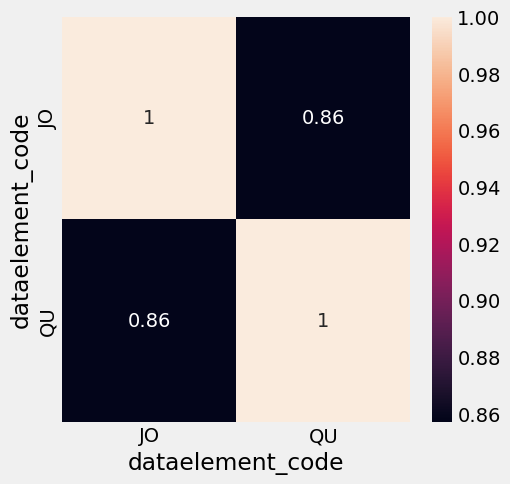

In [493]:
# Check correlation
df_corr = df_pivot.corr()

# Plot
plt.figure(figsize=(5,5))
plt.style.use("fivethirtyeight")

sns.heatmap(data= df_corr, annot=True)
plt.show()